In [135]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib import colormaps as cm
from wordcloud import WordCloud
from PIL import Image
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import matplotlib.colors
from collections import Counter
cmap2 = cm.get_cmap('twilight')
colors1= []
for i in range(cmap2.N):
    rgb= cmap2(i)[:4]
    colors1.append(rgb2hex(rgb))
    #print(rgb2hex(rgb))
# Set style
sns.set(style='whitegrid')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [75]:
df = pd.read_csv('./Reviews-Analysis-and-Recommendation/Data_file.csv',low_memory=False,index_col=0)
# Drop duplicates and Null Values
df.drop_duplicates(inplace=True)
df.dropna(how='any',inplace=True)

In [76]:
df = df.reset_index(drop=True)

In [77]:
# Get to know your data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19662 entries, 0 to 19661
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              19662 non-null  int64 
 1   Age                      19662 non-null  int64 
 2   Title                    19662 non-null  object
 3   Review Text              19662 non-null  object
 4   Rating                   19662 non-null  int64 
 5   Recommended IND          19662 non-null  int64 
 6   Positive Feedback Count  19662 non-null  int64 
 7   Division Name            19662 non-null  object
 8   Department Name          19662 non-null  object
 9   Class Name               19662 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.5+ MB


In [78]:
# See the stats
df.describe().T

count        mean         std   min    25%    50%   
Clothing ID              19662.0  921.297274  200.227528   1.0  861.0  936.0  \
Age                      19662.0   43.260808   12.258122  18.0   34.0   41.0   
Rating                   19662.0    4.183145    1.112224   1.0    4.0    5.0   
Recommended IND          19662.0    0.818177    0.385708   0.0    1.0    1.0   
Positive Feedback Count  19662.0    2.652477    5.834285   0.0    0.0    1.0   

                            75%     max  
Clothing ID              1078.0  1205.0  
Age                        52.0    99.0  
Rating                      5.0     5.0  
Recommended IND             1.0     1.0  
Positive Feedback Count     3.0   122.0

In [79]:
# Get unique Values
df.Rating.value_counts()

Rating
5    10858
4     4289
3     2464
2     1360
1      691
Name: count, dtype: int64

In [80]:
# Get Class name Counts
df['Class Name'].value_counts()

Class Name
Dresses           5371
Knits             3981
Blouses           2587
Sweaters          1218
Pants             1157
Jeans              970
Fine gauge         927
Skirts             796
Jackets            598
Lounge             574
Swim               293
Outerwear          281
Shorts             260
Sleep              174
Legwear            131
Intimates          120
Layering           115
Trend              107
Casual bottoms       1
Chemises             1
Name: count, dtype: int64

In [81]:
# Get Count of Department Name
df['Department Name'].value_counts()

Department Name
Tops        8713
Dresses     5371
Bottoms     3184
Intimate    1408
Jackets      879
Trend        107
Name: count, dtype: int64

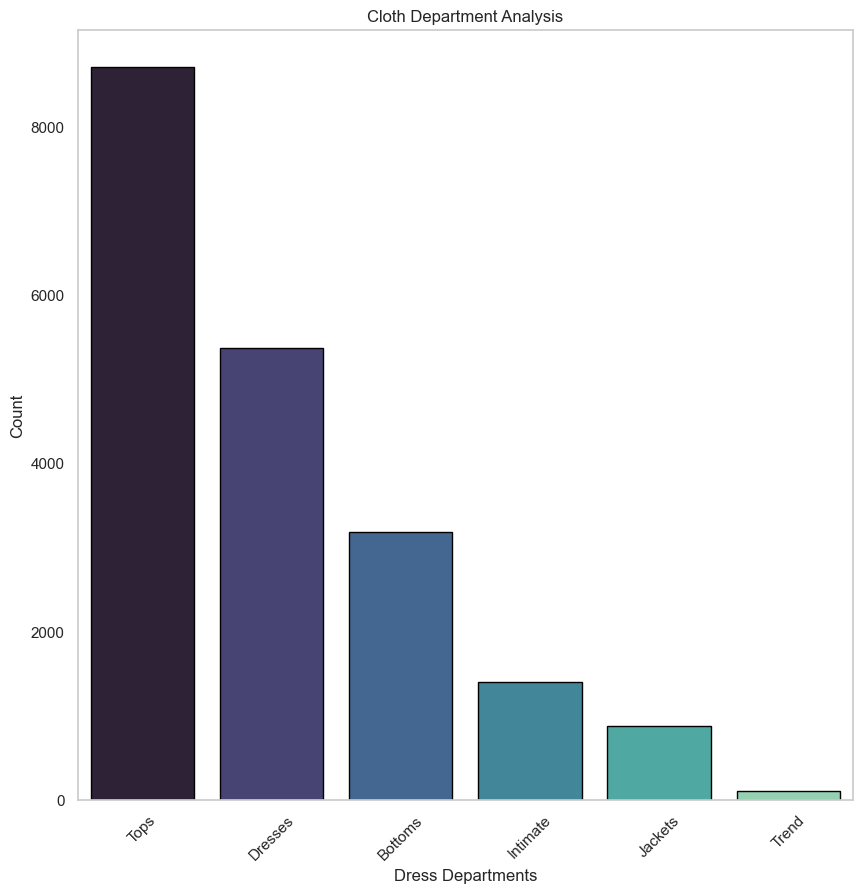

In [82]:
# Cloth Department Analysis
plt.figure(figsize=(10,10))
sns.countplot(x='Department Name',data=df,palette='mako',order=df['Department Name'].value_counts().index,edgecolor='black',linewidth=1)
plt.xlabel('Dress Departments')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Cloth Department Analysis')
plt.grid(False)

plt.show()

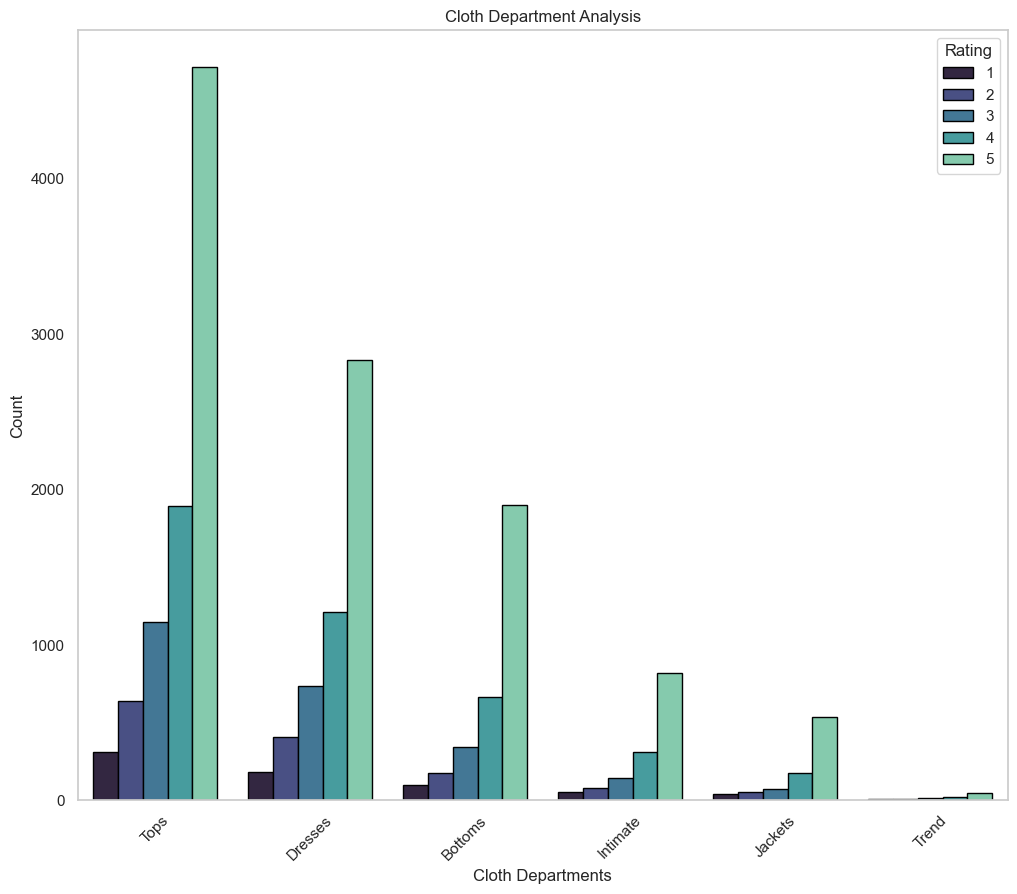

In [83]:
# Cloth Department by Ratings
plt.figure(figsize=(12,10))
sns.countplot(x='Department Name',data=df,palette='mako',order=df['Department Name'].value_counts().index,hue='Rating',edgecolor='black',linewidth=1)
plt.xlabel('Cloth Departments')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Cloth Department Analysis')
plt.grid(False)

plt.show()

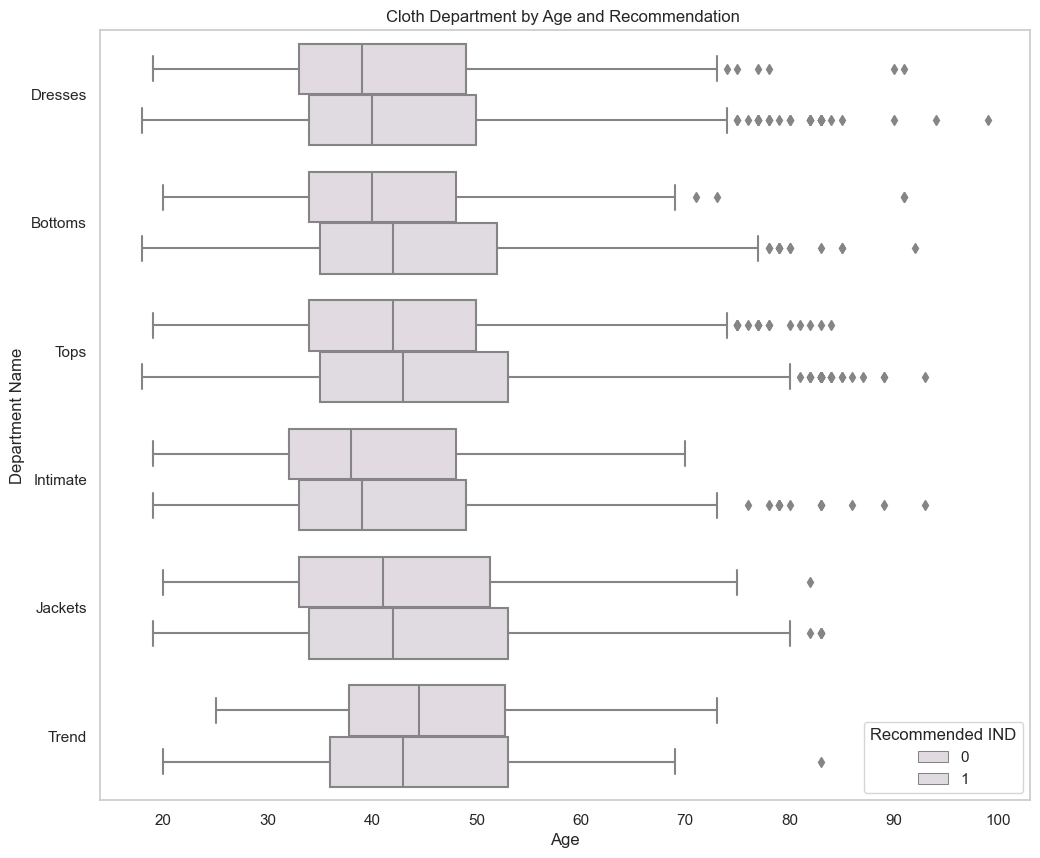

In [84]:
# Cloth Department by Age, Department and Recommendation
plt.figure(figsize=(12,10))
sns.boxplot(x = 'Age', y = 'Department Name', data = df,palette=colors1,hue='Recommended IND')
plt.grid(False)

plt.title('Cloth Department by Age and Recommendation ')
plt.show()

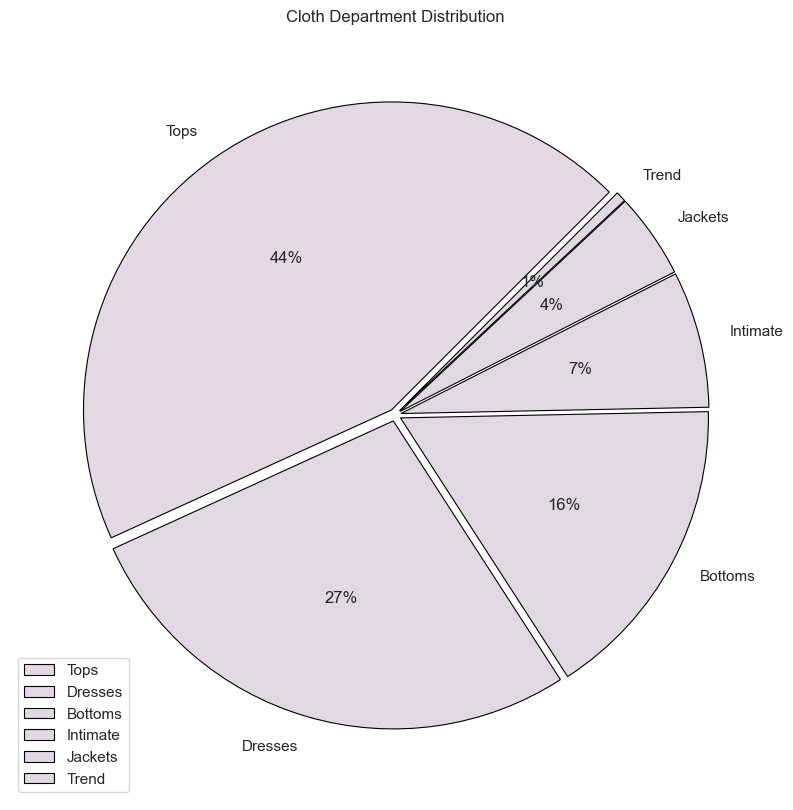

In [85]:
# Cloth Department Distribution
plt.figure(figsize=(12,10))
plt.pie(x=df['Department Name'].value_counts().values,data=df,colors=colors1,labels=df['Department Name'].value_counts().index,autopct='%.0f%%',explode=[0.02 for i in df['Department Name'].value_counts().index],startangle=45,wedgeprops={'linewidth':0.8,'edgecolor':'black'})
plt.title('Cloth Department Distribution')
plt.legend(loc='lower left')

plt.show()

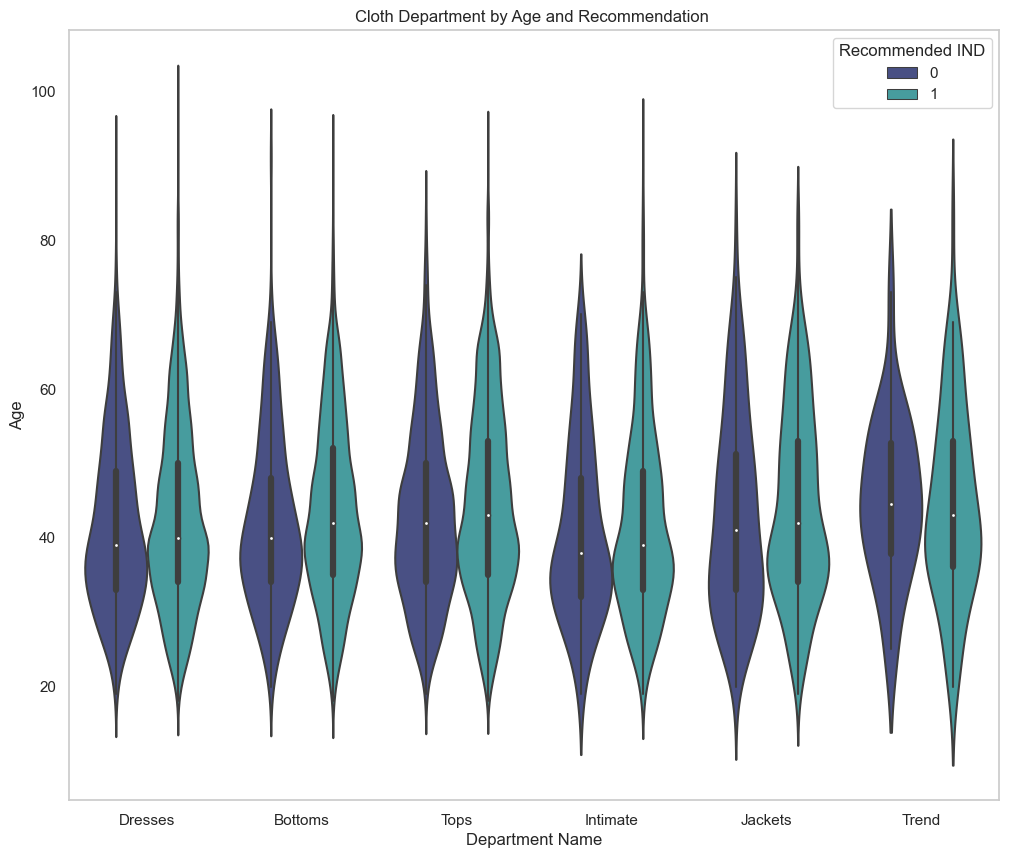

In [86]:
# Cloth Class by Age, Department and Recommendation
plt.figure(figsize=(12,10))
sns.violinplot(x = 'Department Name', y = 'Age', data = df,palette='mako',hue='Recommended IND',orient='v')
plt.grid(False)

plt.title('Cloth Department by Age and Recommendation ')
plt.show()

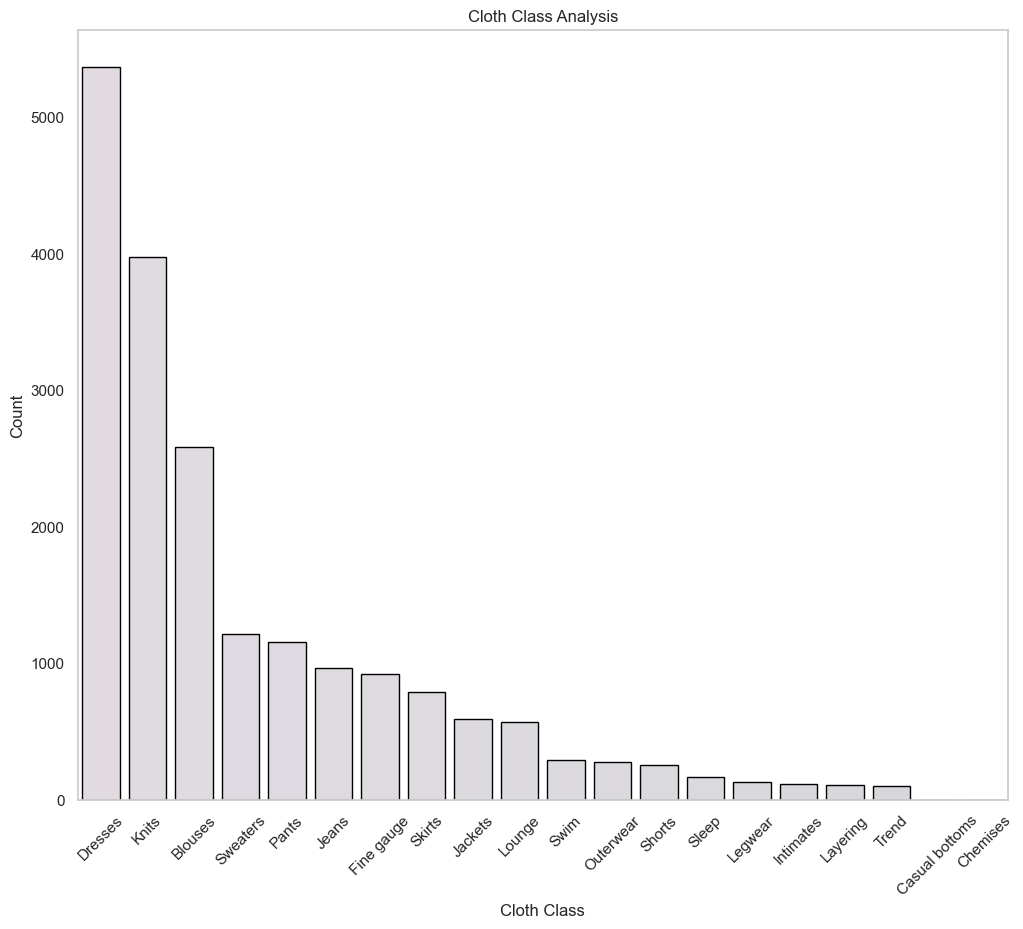

In [87]:
# Cloth Class Analysis
plt.figure(figsize=(12,10))
sns.countplot(x='Class Name',data=df,palette=colors1,order=df['Class Name'].value_counts().index,edgecolor='black',linewidth=1)
plt.xlabel('Cloth Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Cloth Class Analysis')
plt.grid(False)

plt.show()

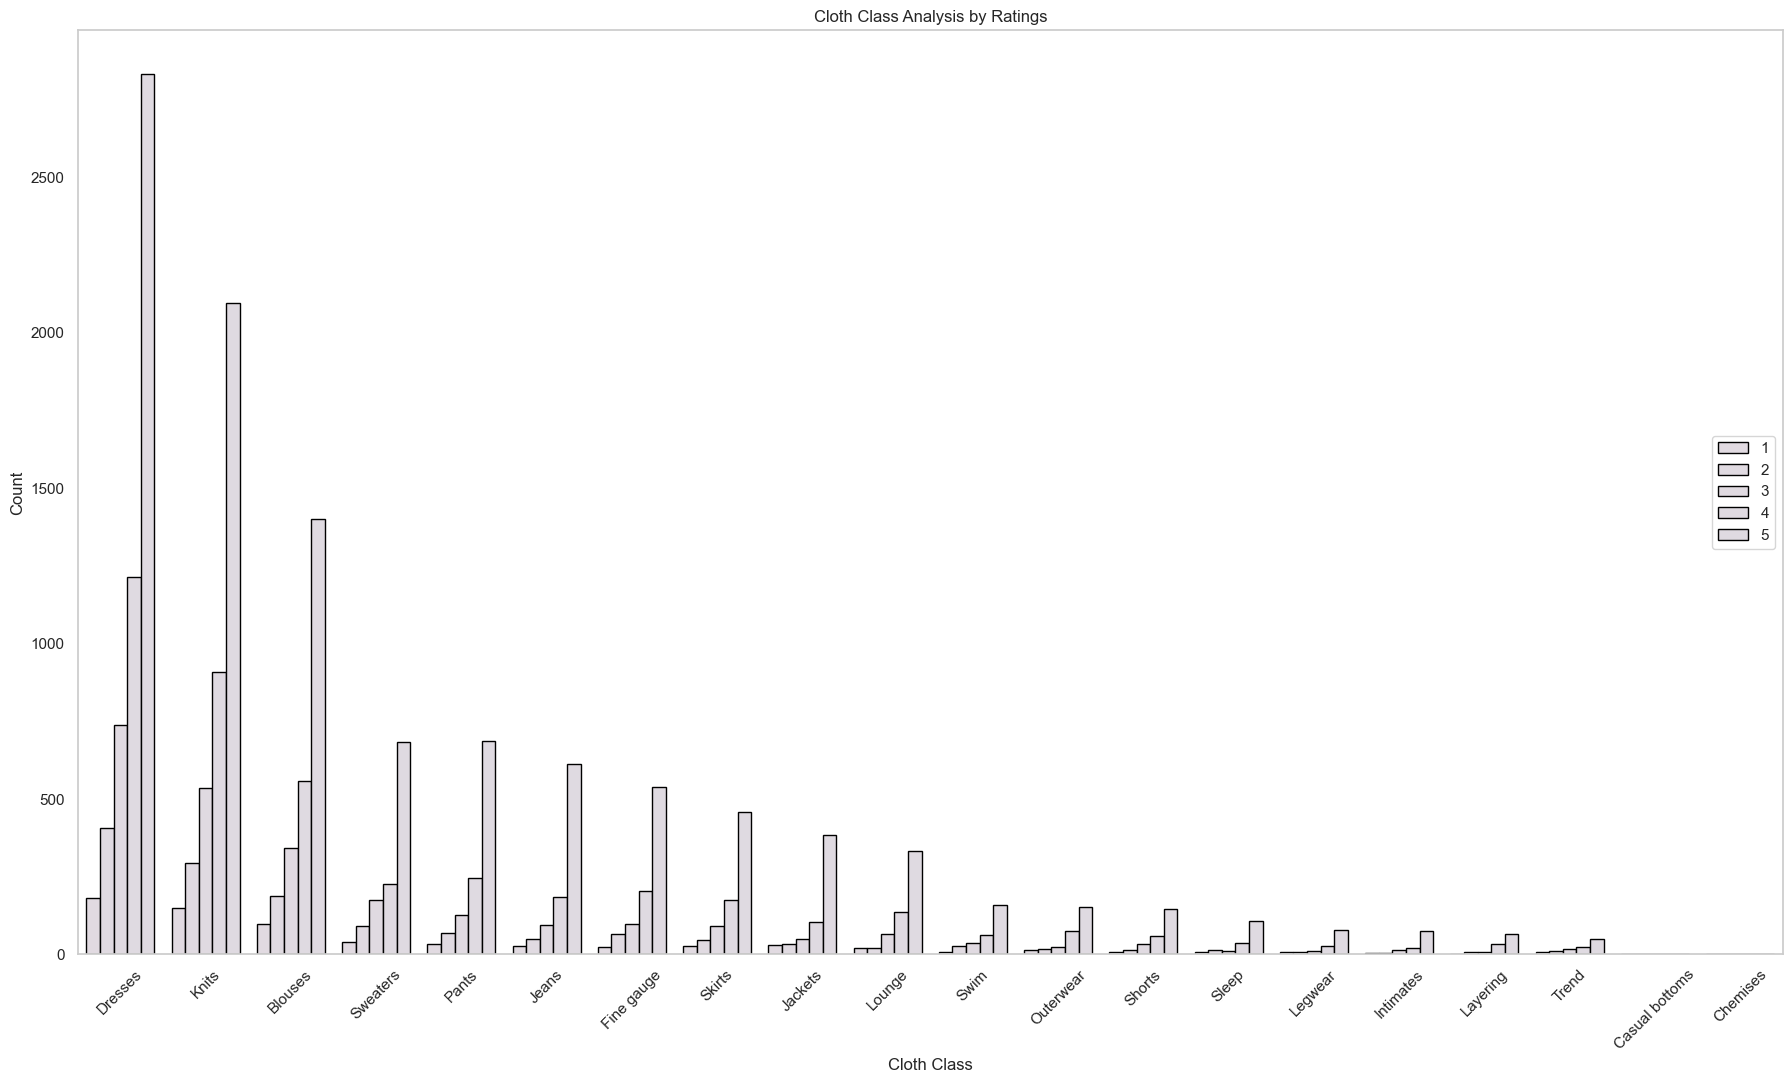

In [88]:
# Cloth Class Analysis by Rating
plt.figure(figsize=(22,12))
sns.countplot(x=df['Class Name'],data=df,palette=colors1,order=df['Class Name'].value_counts().index,edgecolor='black',linewidth=1,hue='Rating')
plt.xlabel('Cloth Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Cloth Class Analysis by Ratings')
plt.grid(False)
plt.legend(loc='right')

plt.show()

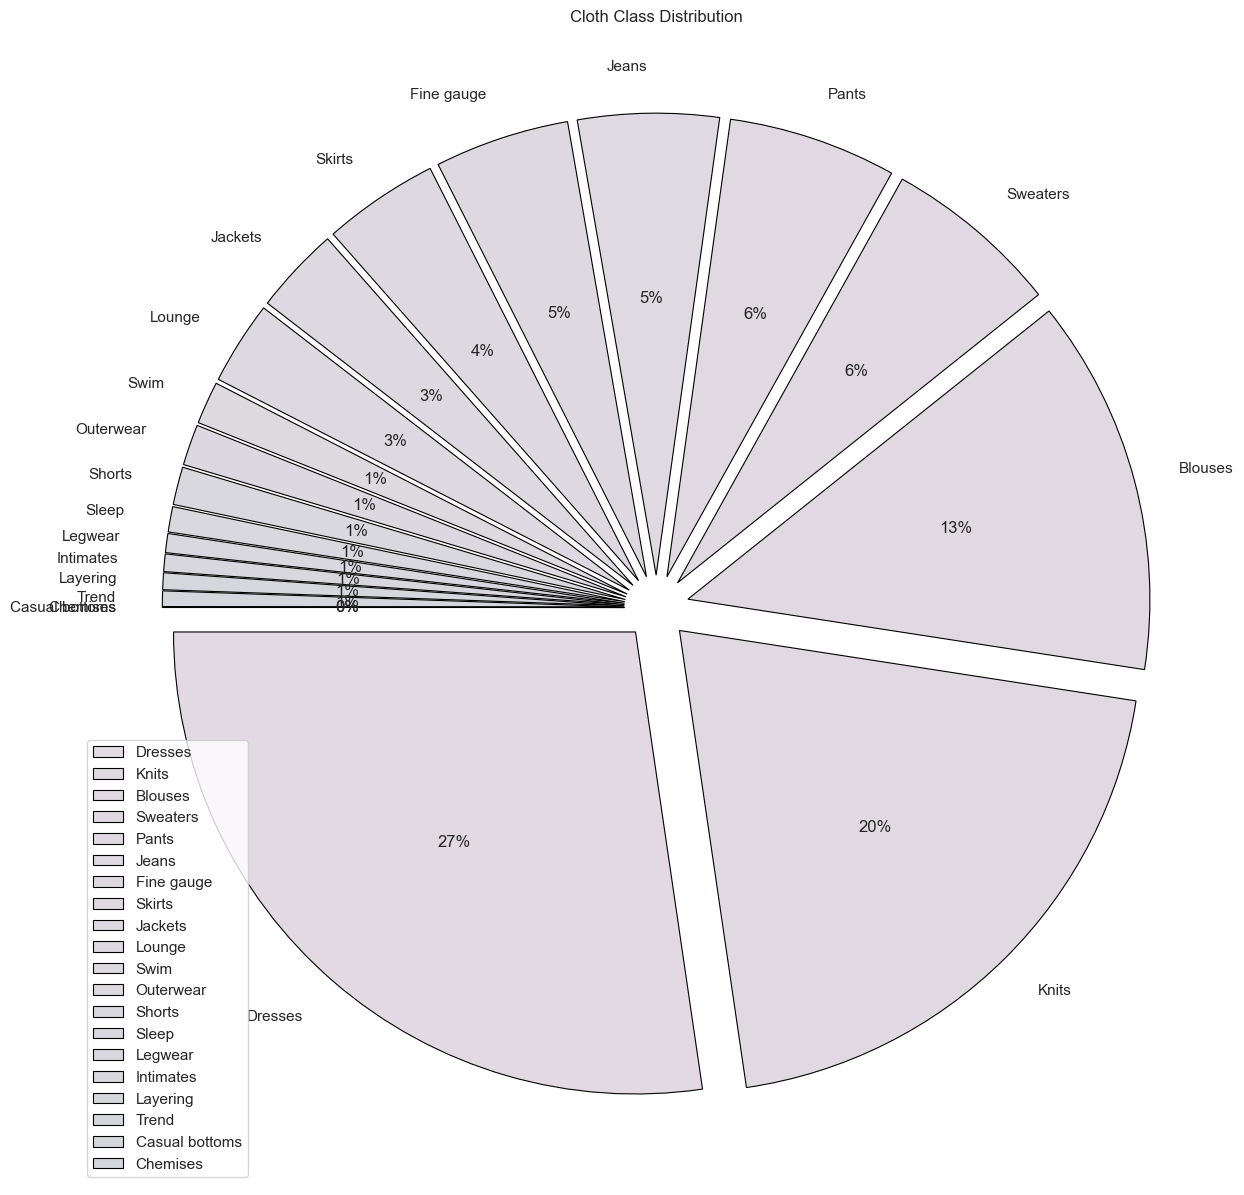

In [89]:
# Cloth Class Distribution
plt.figure(figsize=(18,15))
plt.pie(x=df['Class Name'].value_counts().values,data=df,colors=colors1,labels=df['Class Name'].value_counts().index,autopct='%.0f%%',explode=[0.07 for i in df['Class Name'].value_counts().index],startangle=180,wedgeprops={'linewidth':0.8,'edgecolor':'black'})
plt.title('Cloth Class Distribution')
#plt.grid(False)
plt.legend(loc='lower left')

plt.show()

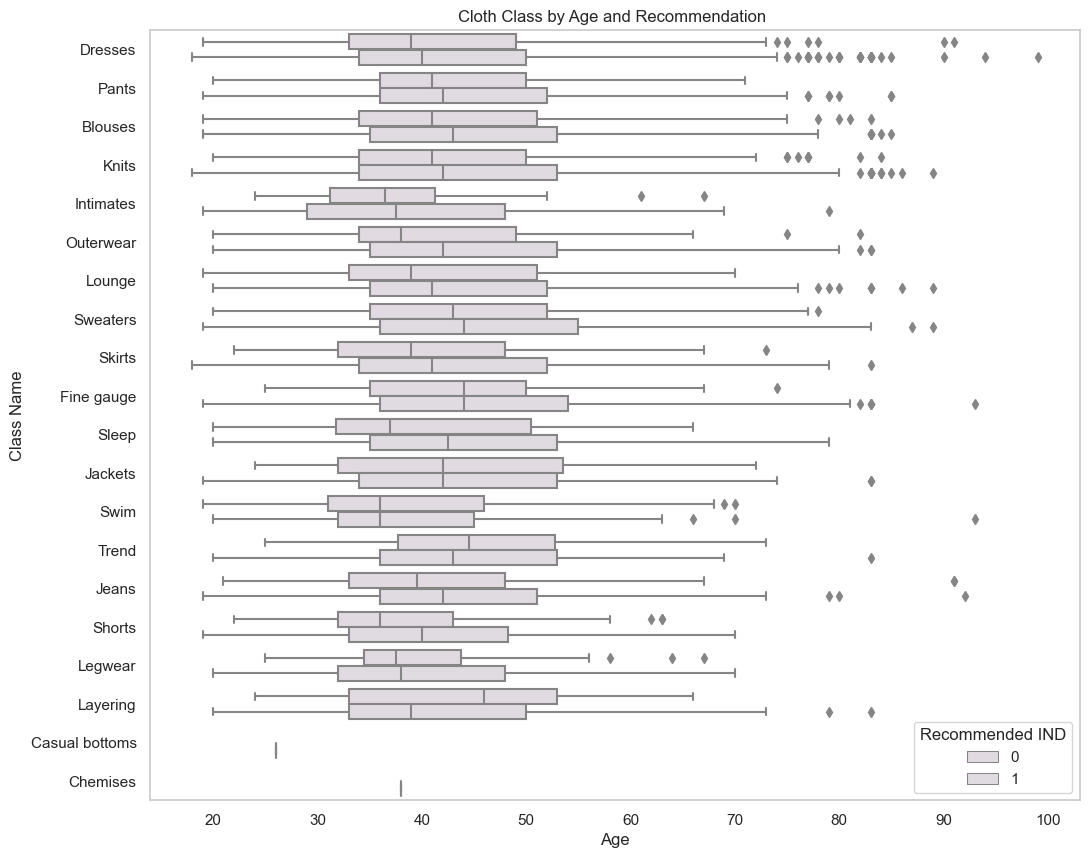

In [90]:
# Cloth Class by Age, Department and Recommendation
plt.figure(figsize=(12,10))
sns.boxplot(x = 'Age', y = 'Class Name', data = df,palette=colors1,hue='Recommended IND')
plt.grid(False)

plt.title('Cloth Class by Age and Recommendation ')
plt.show()

In [91]:
# Division Value Counts
df['Division Name'].value_counts()

Division Name
General           11664
General Petite     6778
Initmates          1220
Name: count, dtype: int64

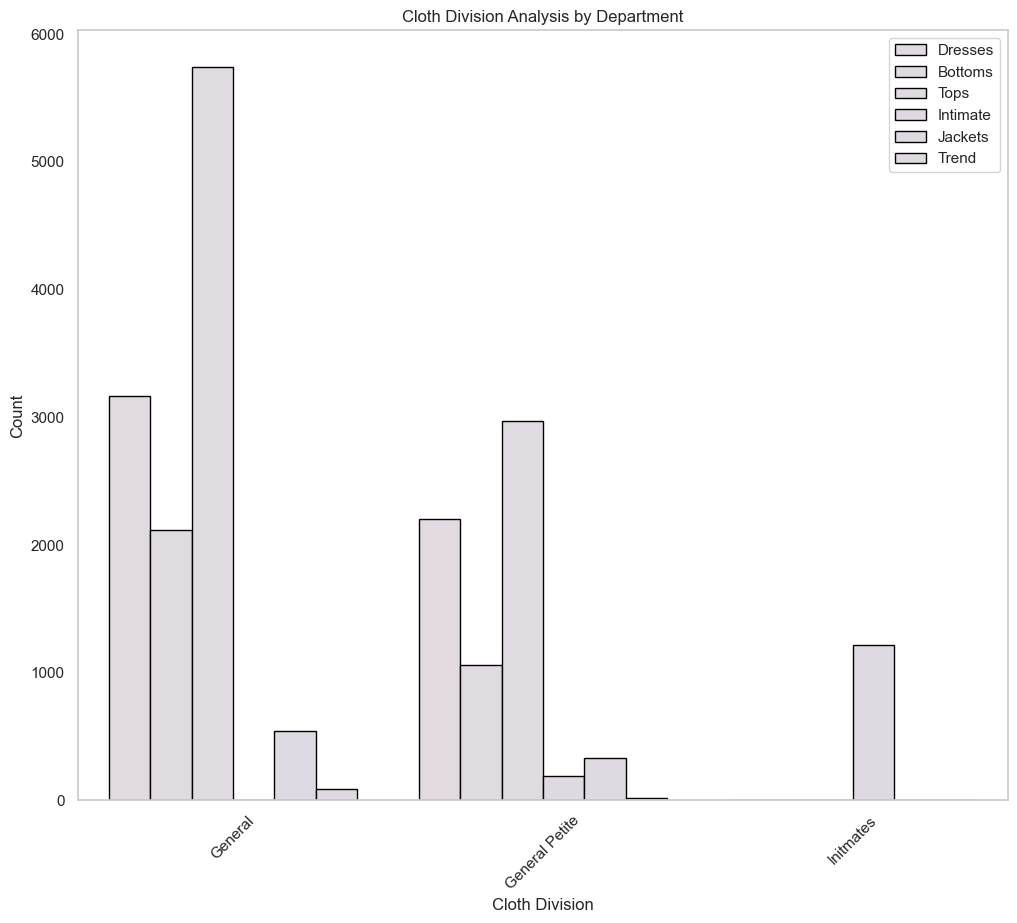

In [92]:
# Cloth Division Analysis by Department
plt.figure(figsize=(12,10))
sns.countplot(x='Division Name',data=df,palette=colors1,order=df['Division Name'].value_counts().index,edgecolor='black',linewidth=1,hue='Department Name')
plt.xlabel('Cloth Division')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Cloth Division Analysis by Department')
plt.grid(False)
plt.legend(loc='upper right')

plt.show()

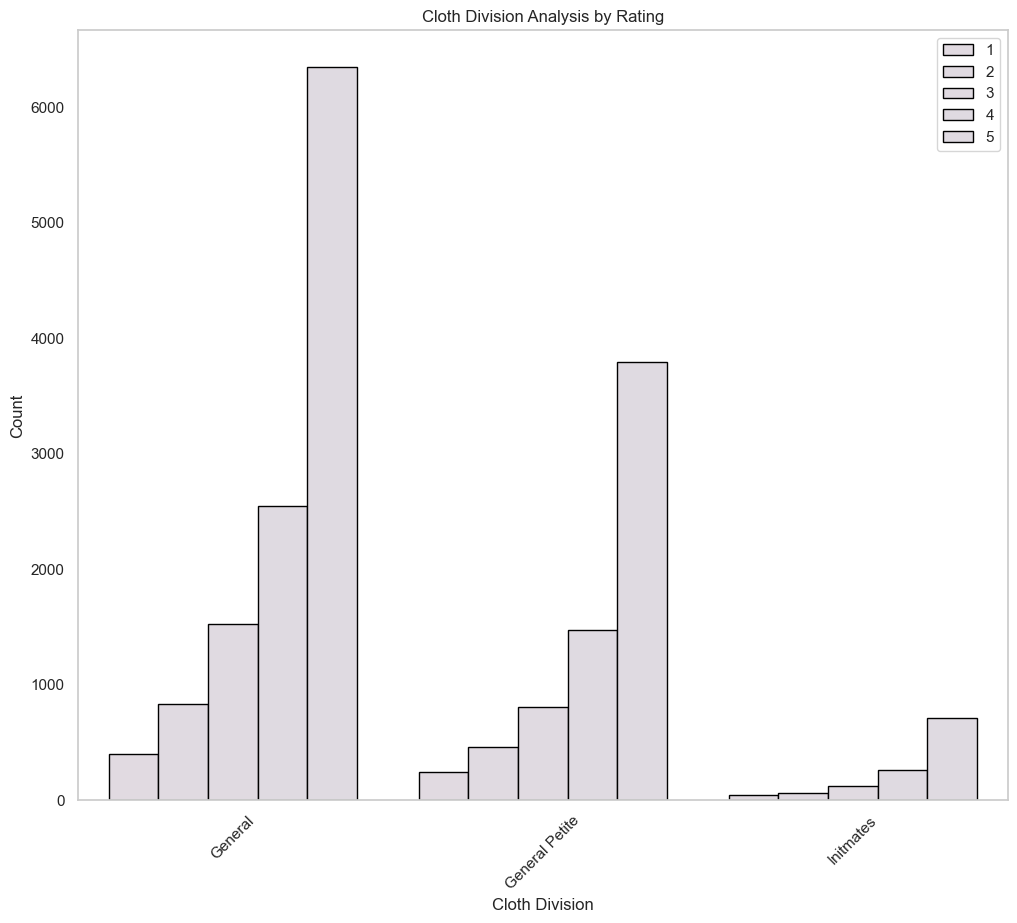

In [93]:
# Cloth Division by Rating
plt.figure(figsize=(12,10))
sns.countplot(x='Division Name',data=df,palette=colors1,order=df['Division Name'].value_counts().index,edgecolor='black',linewidth=1,hue='Rating')
plt.xlabel('Cloth Division')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Cloth Division Analysis by Rating')
plt.grid(False)
plt.legend(loc='upper right')

plt.show()

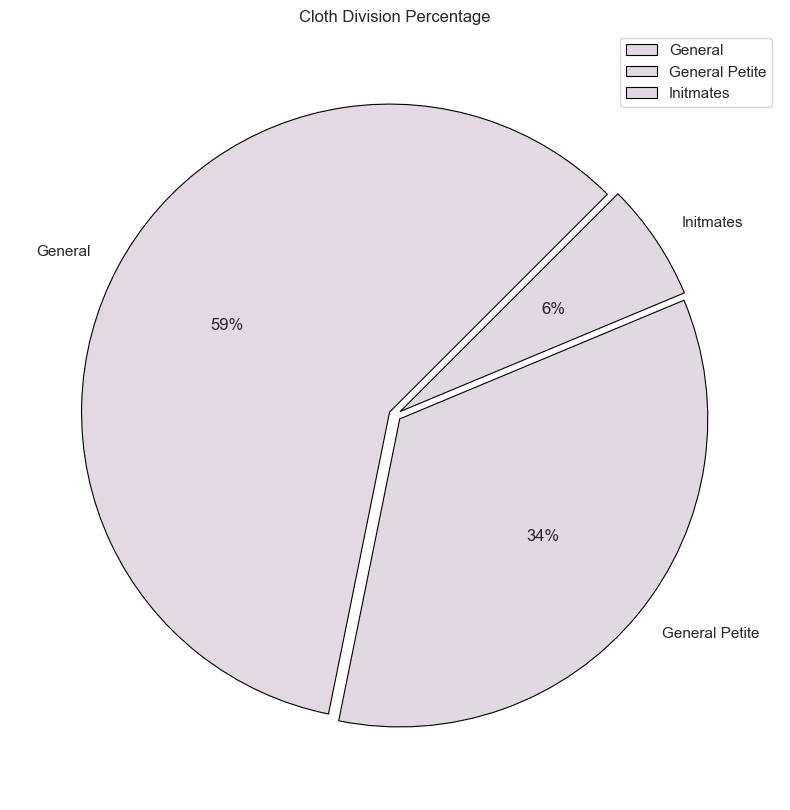

In [94]:
# Cloth Division Percentage
plt.figure(figsize=(12,10))
plt.pie(x=df['Division Name'].value_counts().values,data=df,colors=colors1,labels=df['Division Name'].value_counts().index,autopct='%.0f%%',explode=[0.02 for i in df['Division Name'].value_counts().index],startangle=45,wedgeprops={'linewidth':0.8,'edgecolor':'black'})
plt.title('Cloth Division Percentage')
plt.legend()
plt.show()

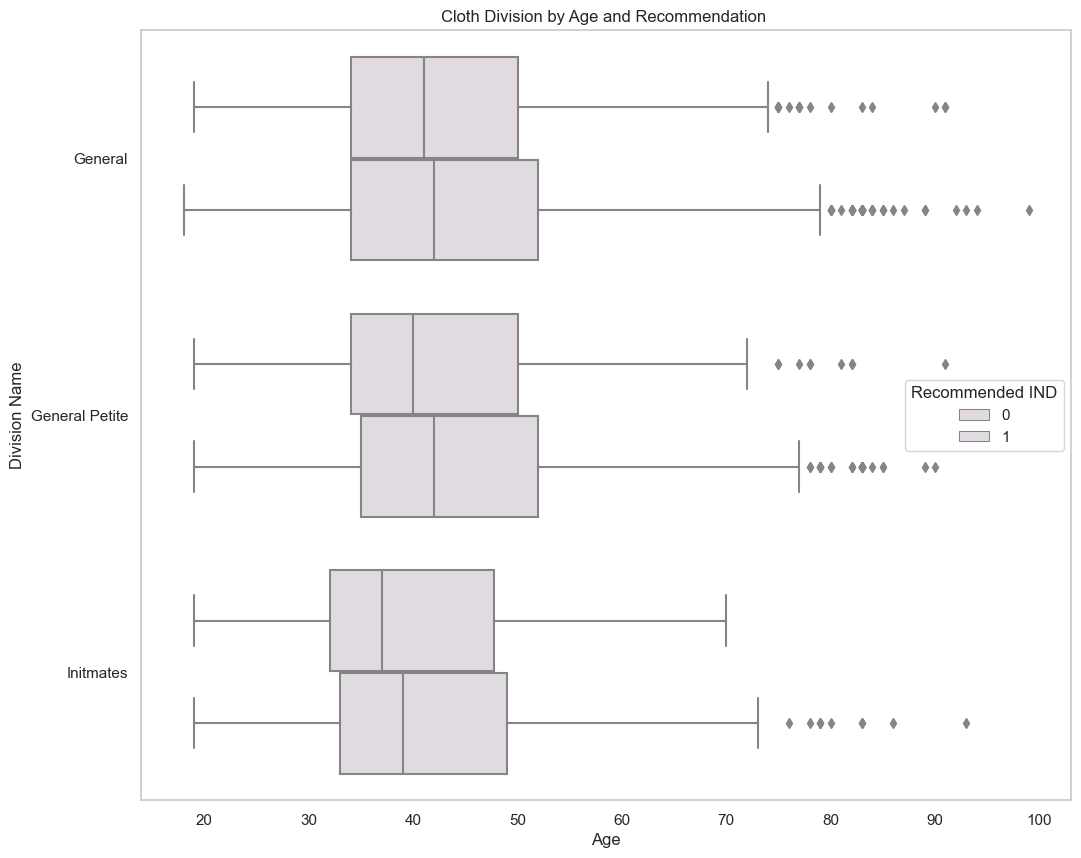

In [95]:
# Cloth Division Name by Age
plt.figure(figsize=(12,10))
sns.boxplot(x = 'Age', y = 'Division Name', data = df,palette=colors1,hue='Recommended IND')
plt.grid(False)

plt.title('Cloth Division by Age and Recommendation ')
plt.show()

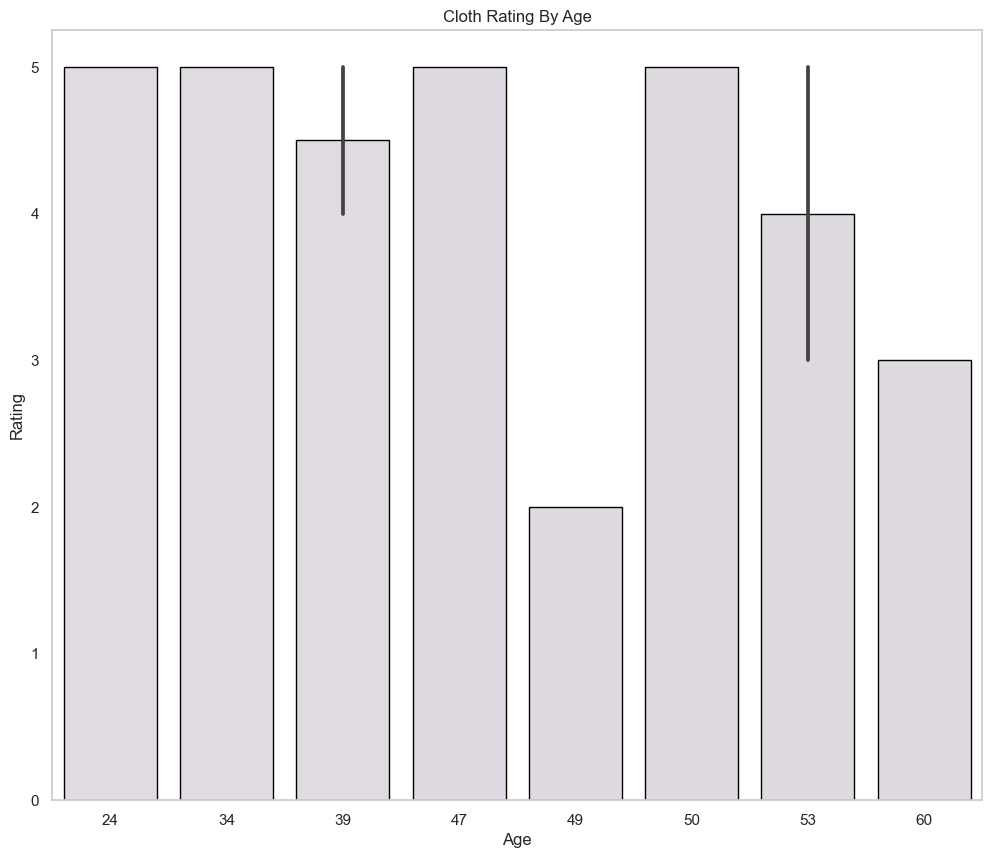

In [96]:
# Rating by Age
plt.figure(figsize=(12,10))
sns.barplot(x=df['Age'].head(10),y='Rating',data=df,palette=colors1,edgecolor='black',linewidth=1)
plt.title('Cloth Rating By Age')
plt.grid(False)

plt.show()

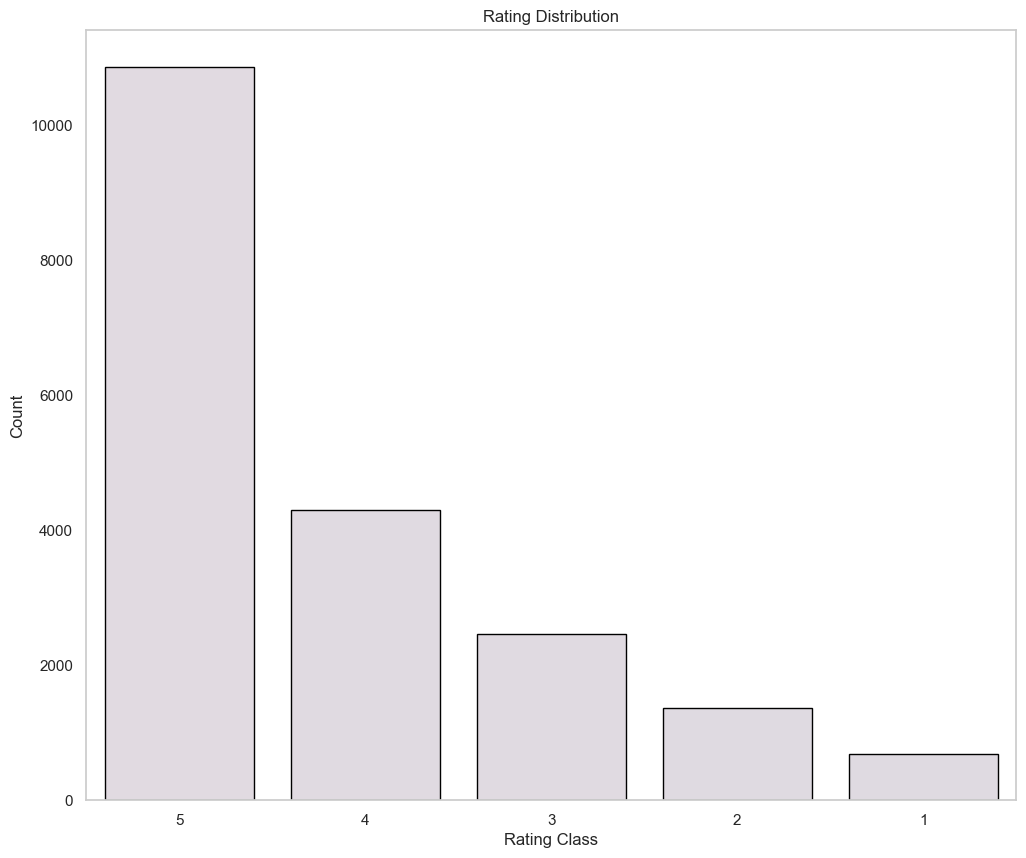

In [97]:
# Rating Distribution
plt.figure(figsize=(12,10))
sns.countplot(x='Rating',data=df,palette=colors1,order=df['Rating'].value_counts().index,edgecolor='black',linewidth=1)
plt.xlabel('Rating Class')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.grid(False)
plt.show()

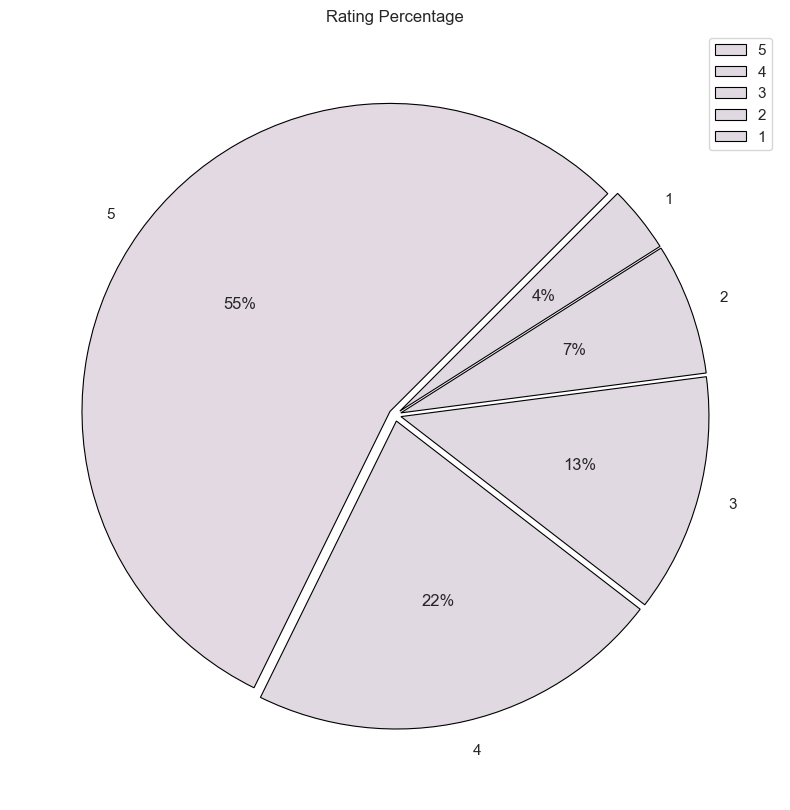

In [98]:
# Rating Percentage
plt.figure(figsize=(12,10))
plt.pie(x=df['Rating'].value_counts().values,data=df,colors=colors1,labels=df['Rating'].value_counts().index,autopct='%.0f%%',explode=[0.02 for i in df['Rating'].value_counts().index],startangle=45,wedgeprops={'linewidth':0.8,'edgecolor':'black'})
plt.title('Rating Percentage')
plt.legend()

plt.show()

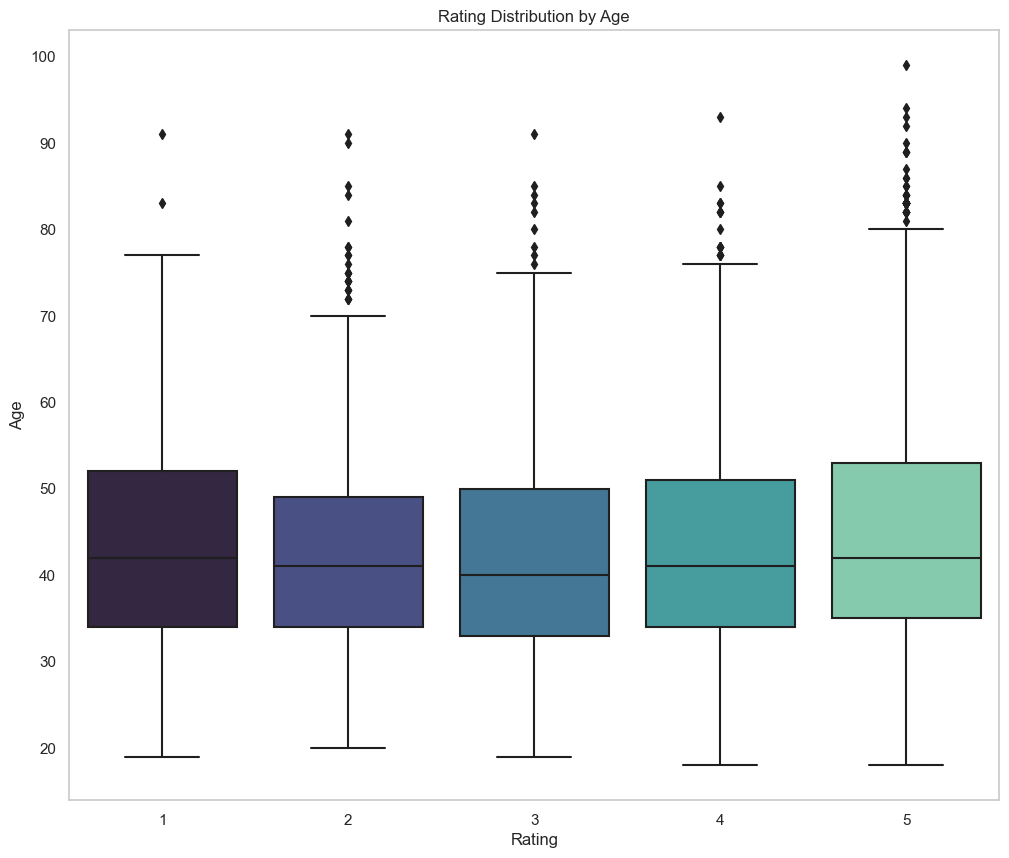

In [99]:
# Rating Distribution by Age
plt.figure(figsize=(12,10))
sns.boxplot(x = 'Rating', y = 'Age', data = df,palette='mako')
plt.grid(False)

plt.title('Rating Distribution by Age')
plt.show()

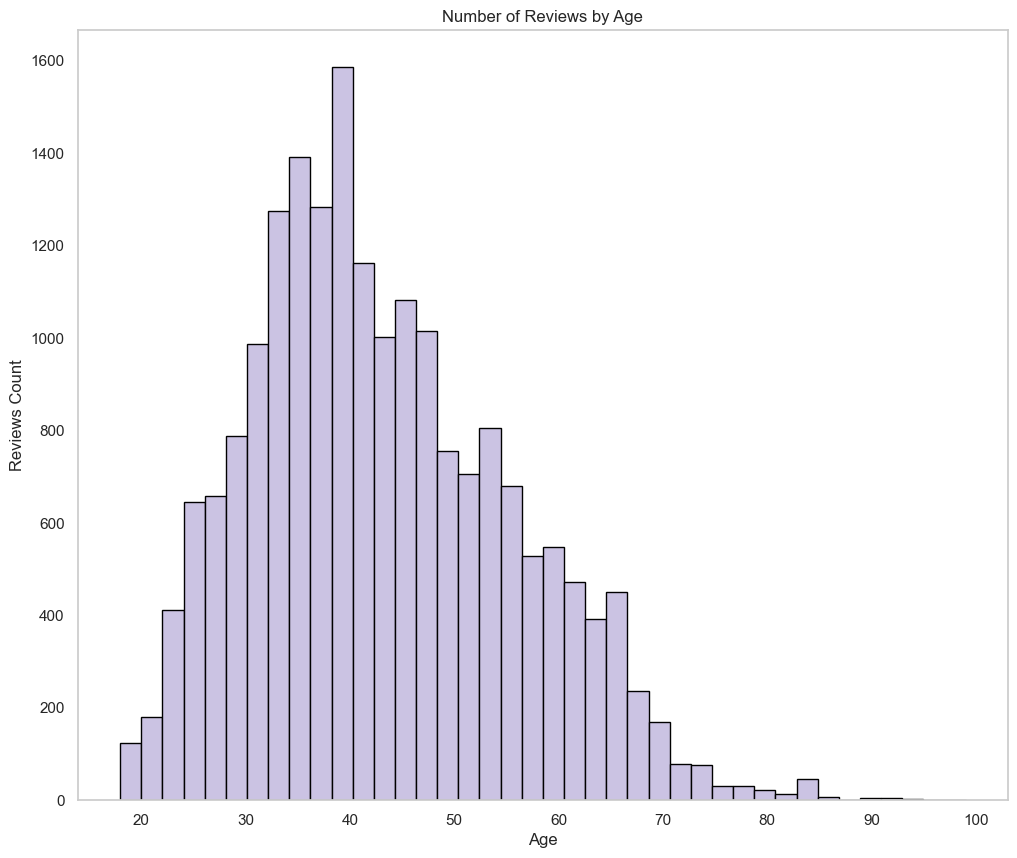

In [100]:
# Age Distribution
plt.figure(figsize=(12,10))
plt.hist(df['Age'], bins=40,color='#CBC3E3',edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Reviews Count')
plt.grid(False)
plt.title('Number of Reviews by Age')

plt.show()

In [101]:
# Cloth Recommendation Analysis
df['Recommended IND'].value_counts()

Recommended IND
1    16087
0     3575
Name: count, dtype: int64

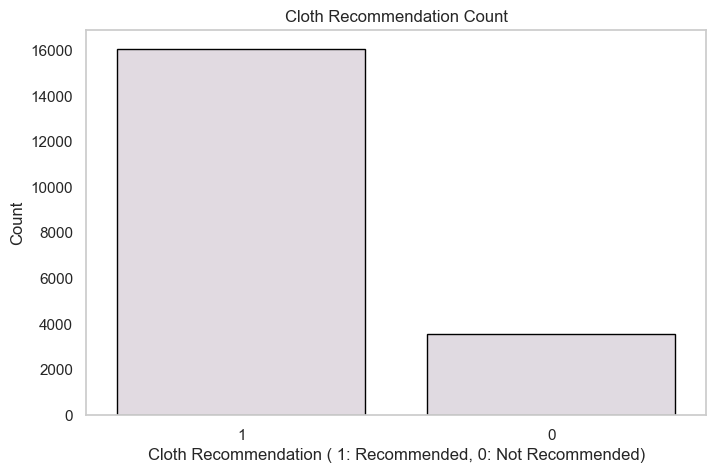

In [102]:
# Cloth Recommendation Count
plt.figure(figsize=(8,5))
sns.countplot(x='Recommended IND',data=df,palette=colors1,order=df['Recommended IND'].value_counts().index,edgecolor='black',linewidth=1)
plt.xlabel('Cloth Recommendation ( 1: Recommended, 0: Not Recommended)')
plt.ylabel('Count')
plt.title('Cloth Recommendation Count')
plt.grid(False)

plt.show()

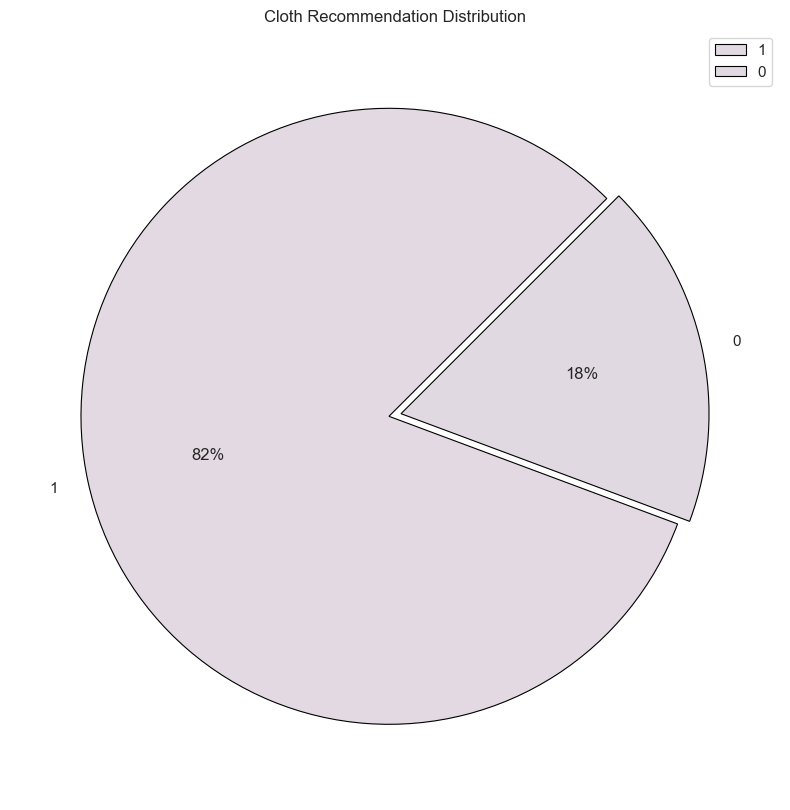

In [103]:
# Recommendation Distribution ( 1 means recommended and 0 means not # Recommended by the Customer)
plt.figure(figsize=(12,10))
plt.pie(x=df['Recommended IND'].value_counts().values,data=df,colors=colors1,labels=df['Recommended IND'].value_counts().index,autopct='%.0f%%',explode=[0.02 for i in df['Recommended IND'].value_counts().index],startangle=45,wedgeprops={'linewidth':0.8,'edgecolor':'black'})
plt.title('Cloth Recommendation Distribution')
plt.legend()

plt.show()

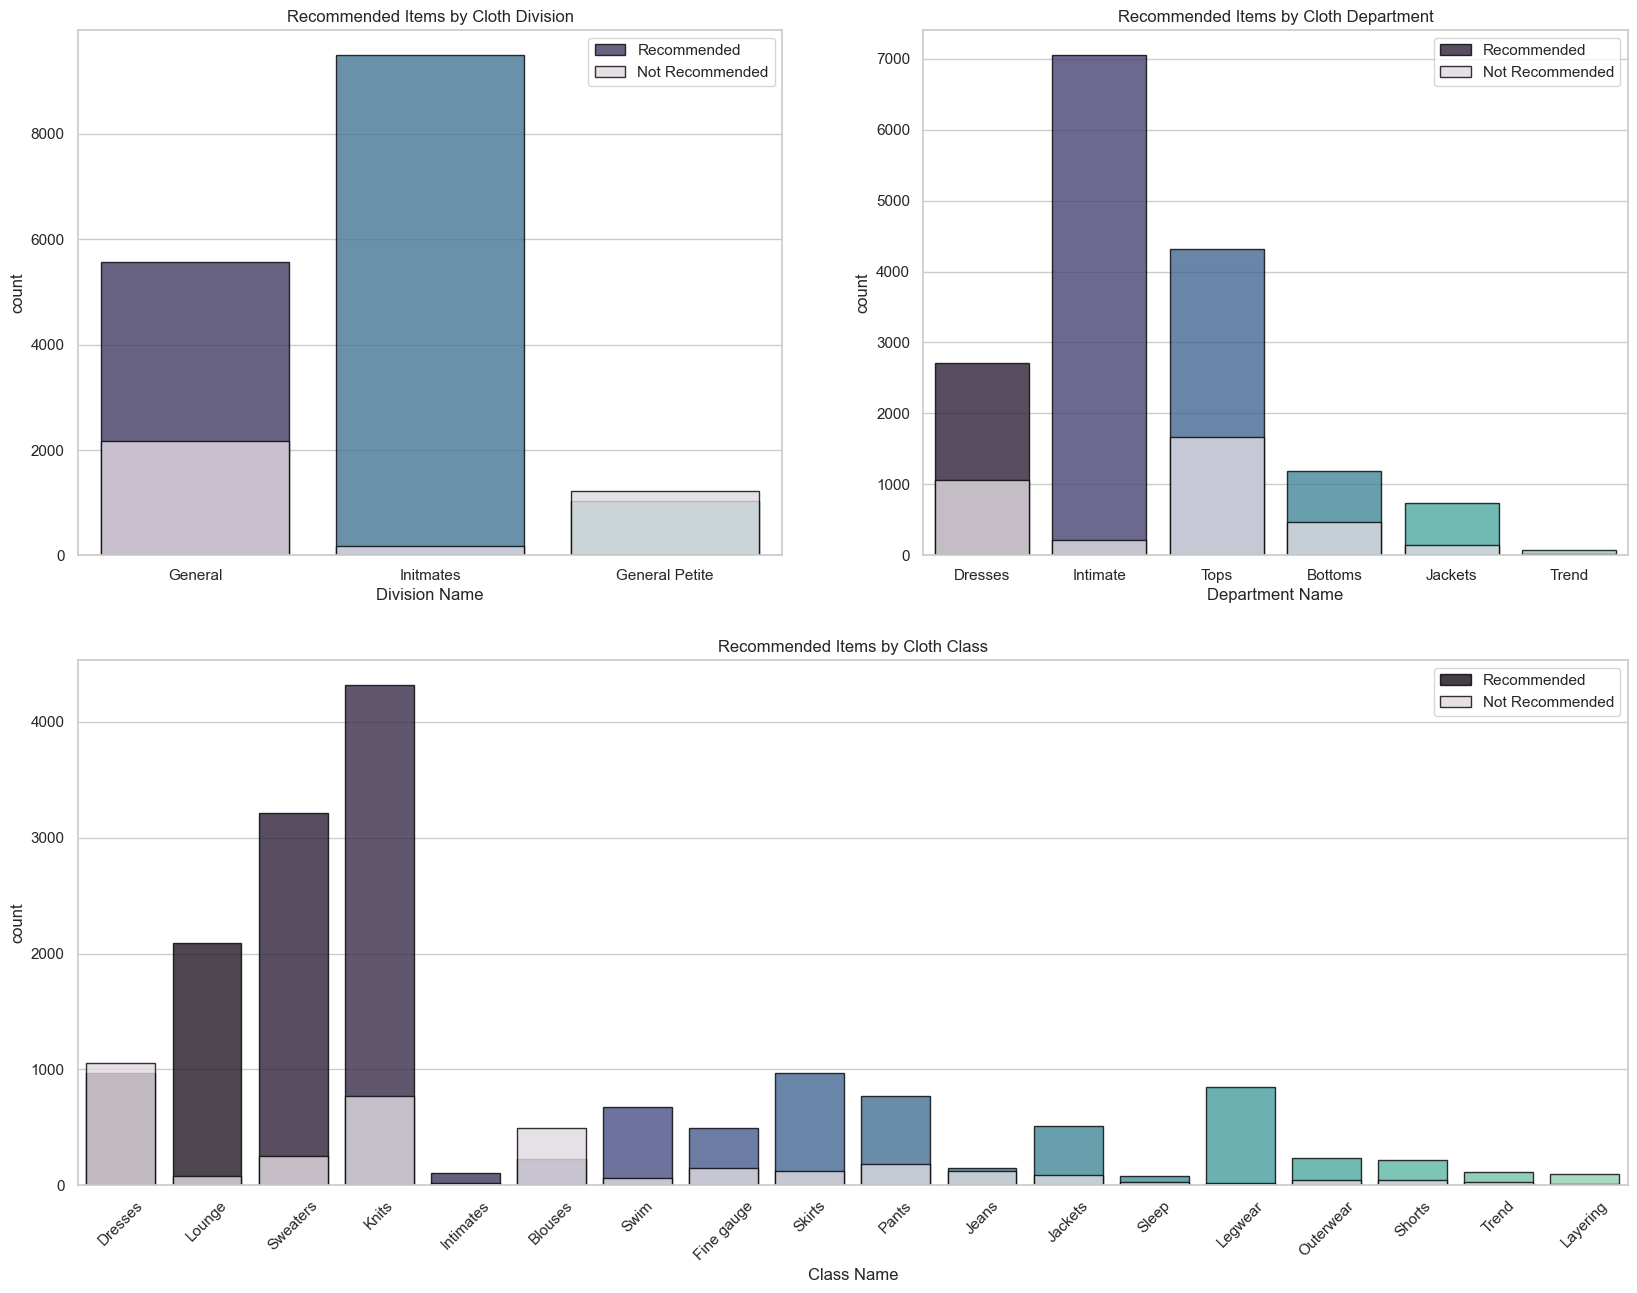

In [120]:

# recommendation Analysis ( 1 means recommended and 0 means not Recommended by the Customer)
r = df[df['Recommended IND']==1]
not_r= df[df['Recommended IND']==0]
r=r.reset_index(drop=True)
not_r=not_r.reset_index(drop=True)
# Plot Cloth Recommendation by Cloth Department, Division, Class
fig = plt.figure(figsize=(20, 15))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = sns.countplot(x=r['Division Name'], palette ='mako', alpha = 0.8, label = "Recommended",edgecolor='black',linewidth=1)
ax1 = sns.countplot(x=not_r['Division Name'], palette = colors1, alpha = 0.8, label = "Not Recommended",edgecolor='black',linewidth=1)
ax1 = plt.title("Recommended Items by Cloth Division")
ax1 = plt.legend()
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = sns.countplot(x=r['Department Name'], palette ='mako', alpha = 0.8, label = "Recommended",edgecolor='black',linewidth=1)
ax2 = sns.countplot(x=not_r['Department Name'], palette =colors1, alpha = 0.8, label = "Not Recommended",edgecolor='black',linewidth=1)
ax2 = plt.title("Recommended Items by Cloth Department")
ax2 = plt.legend()
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.countplot(x=r['Class Name'], palette ='mako', alpha = 0.8, label = "Recommended",edgecolor='black',linewidth=1)
ax3 = sns.countplot(x=not_r['Class Name'], palette =colors1, alpha = 0.8, label = "Not Recommended",edgecolor='black',linewidth=1)
ax3 = plt.title("Recommended Items by Cloth Class")
ax3 = plt.legend()

plt.show()

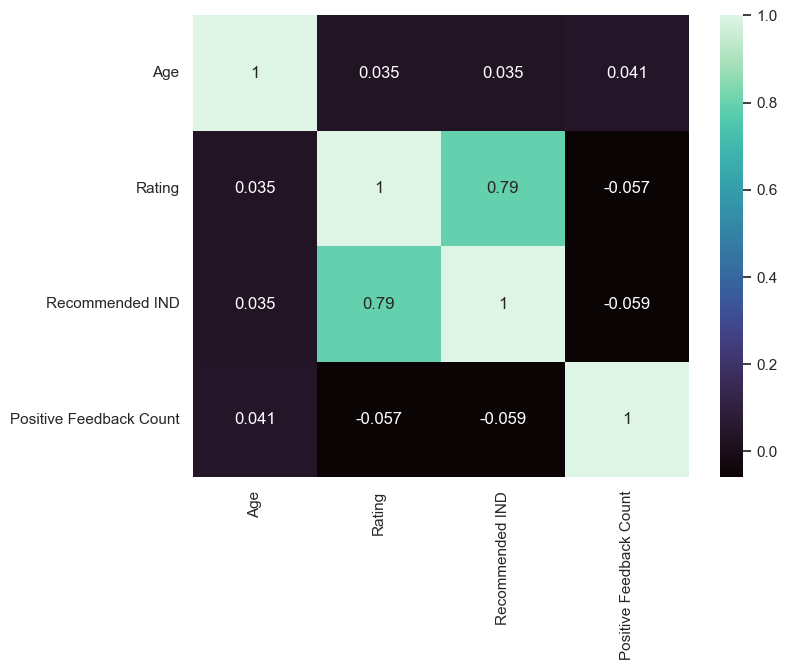

In [128]:
# heatmap
plt.figure(figsize=(8,6))
h = df.drop('Clothing ID',axis=1).corr(numeric_only=True)
sns.heatmap(data=h,annot=True,cmap='mako')
plt.show()

In [129]:
# Tokenizing the reviews
def tokens(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()                   
    return " ".join(text)

df['Review Text'] = df['Review Text'].astype(str)
df['Final_Reviews'] = df['Review Text'].apply(tokens)

# Use the Stop words
sw = stopwords.words('english')
clothes =['skirt','pants','white','black','fabric','silky','leather','blouse','sleeve','even','jacket','dress','color','wear','top','sweater','material','shirt','jeans','pant']

def stopwords(review):
    text = [word.lower() for word in review.split() if word.lower() not in sw and word.lower() not in clothes]
    return " ".join(text)

df['Final_Reviews'] = df['Final_Reviews'].apply(stopwords)

# Lemmatize
from nltk.stem.wordnet import WordNetLemmatizer
lm = WordNetLemmatizer()

def lemma(text):
    lem_text = [lm.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

df['Final_Reviews'] = df['Final_Reviews'].apply(lemma)
     

In [130]:

# Seperating Positive and Negative Reviews
nw = []
pw =[]
pos = df[df['Recommended IND']== 1]
neg = df[df['Recommended IND']== 0]
for r in neg.Final_Reviews:
    nw.append(r)
nw = ' '.join(nw)
for r in pos.Final_Reviews:
    pw.append(r) 
pw = ' '.join(pw)
     

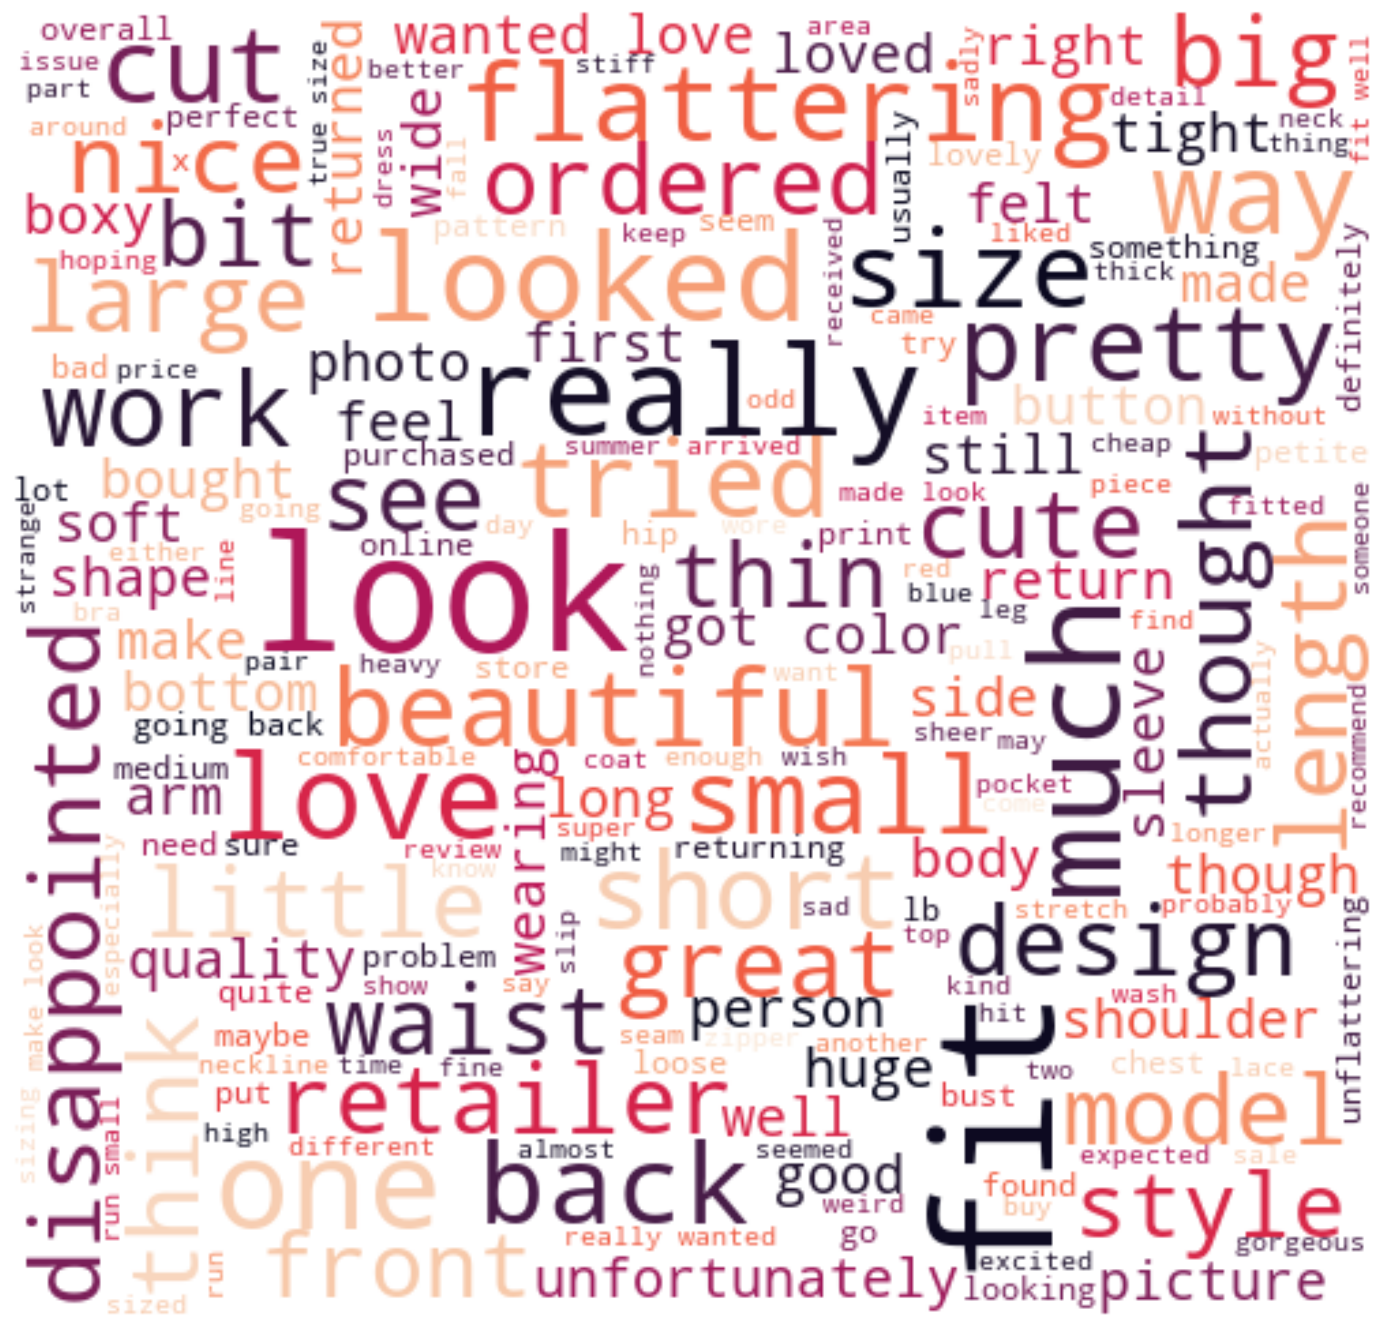

In [131]:

# Wordcloud of Negative Reivews
wordcloud = WordCloud(background_color="white", max_words=len(nw),width=500, height=480, max_font_size=60, min_font_size=10,colormap='rocket')
wordcloud.generate(nw)
plt.figure(figsize=(20,17))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

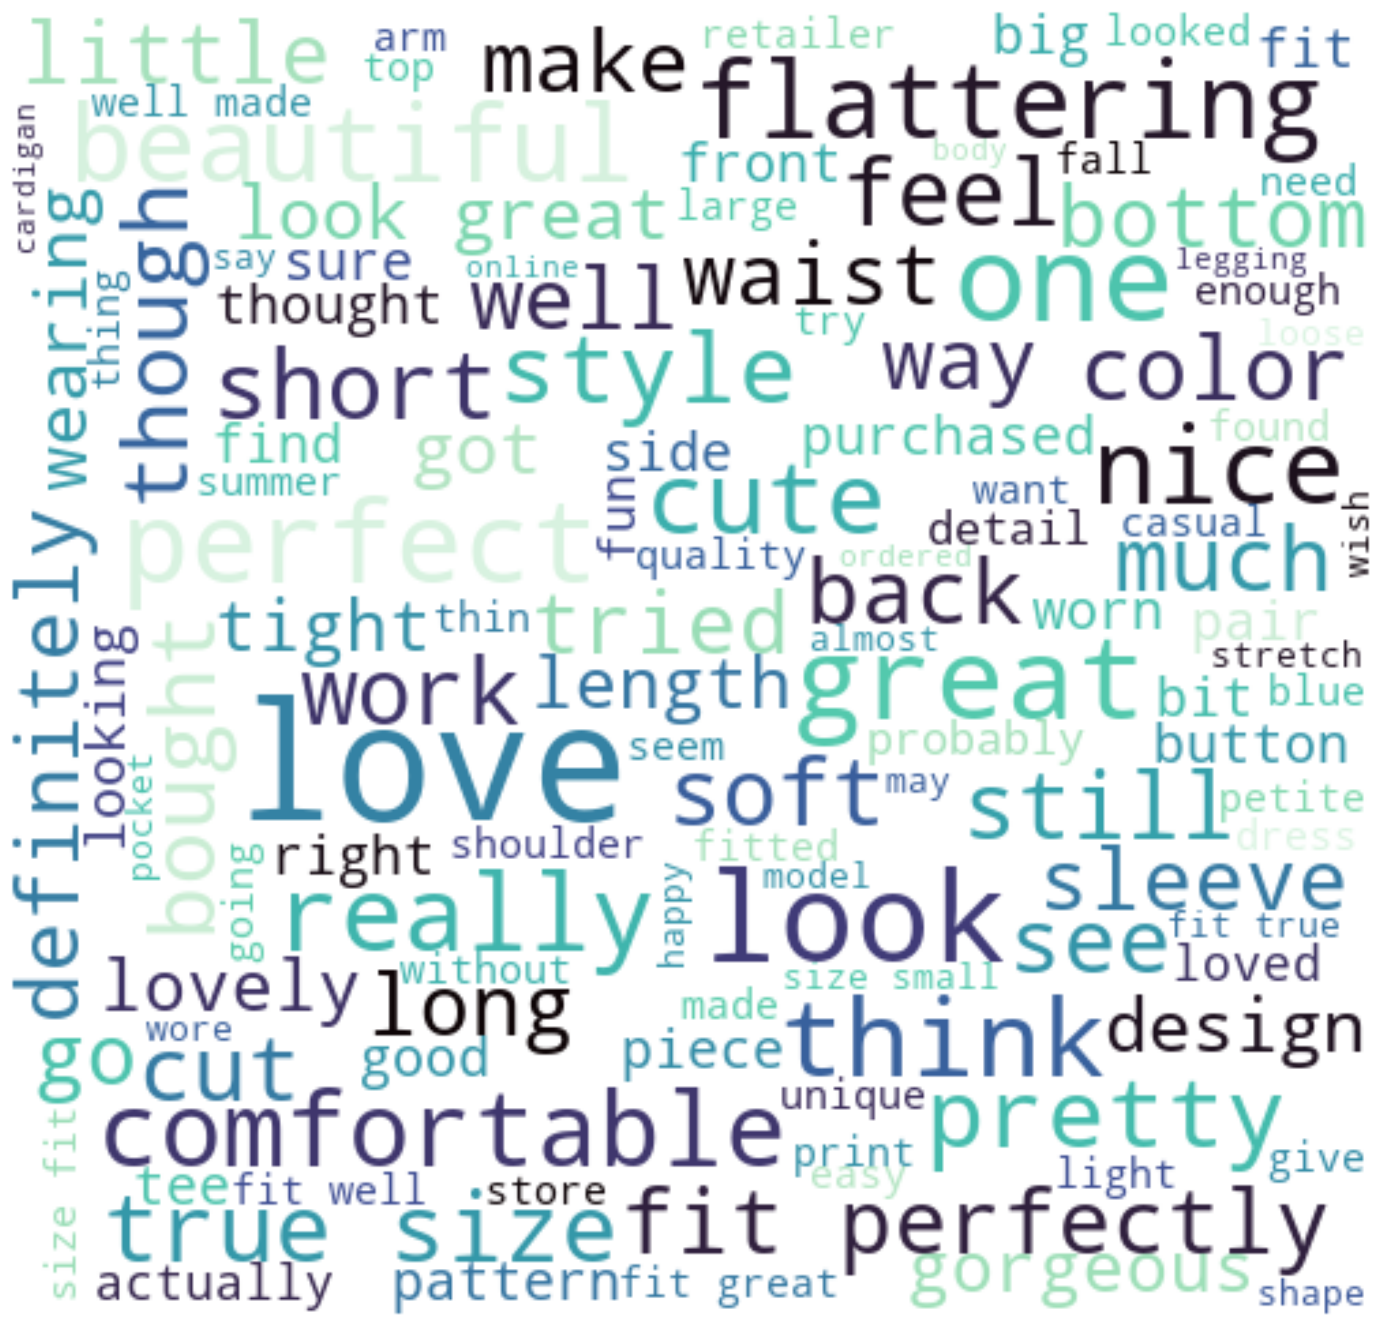

In [132]:

# Word Cloud of positive Reviews
wordcloud = WordCloud(background_color="white", max_words=len(pw),width=500, height=480, max_font_size=60, min_font_size=10,colormap='mako')
wordcloud.generate(pw)
plt.figure(figsize=(20,17))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)

plt.show()

In [133]:

# Building Model
X = pos['Final_Reviews']
y = pos['Recommended IND']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
# Count Vectorizer
v = CountVectorizer(min_df=7, ngram_range=(1,2)).fit(X_train)
X_tv = v.transform(X_train)

# Naive Bayes 
These are classification algorithms based on Bayes’ Theorem. They are extremely fast for both training and prediction and provide probabilistic prediction. Multinomial NB is used for discrete counts.

The formula for Bayes’ theorem is given as:


Bayes’s theorem tells us how to express this in terms of quantities we can calculate more directly:

$P(L | features)=\frac{P(features | L)P(L)}{P(features)}$

Examples include spam filtration, Sentimental analysis, and classifying articles.

In [136]:
# Naive Bayes
model_nb = Pipeline([('v', CountVectorizer(min_df=7, ngram_range=(1,2))),('tfidf', TfidfTransformer()),('clf',MultinomialNB())])
model_nb.fit(X_train, y_train)
ytest = np.array(y_test)
pred_nb = model_nb.predict(X_test)
print('accuracy %s' % accuracy_score(pred_nb, y_test))
print('Confusion Matrix:',confusion_matrix(y_test, pred_nb))
print(classification_report(ytest, pred_nb))

accuracy 1.0
Confusion Matrix: [[4827]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4827

    accuracy                           1.00      4827
   macro avg       1.00      1.00      1.00      4827
weighted avg       1.00      1.00      1.00      4827



# Random Forest 
It’s a supervised machine learning algorithm that is constructed from decision tree algorithms ( it predicts the outcome by taking the average or mean of the output from the different trees) and Is used to solve both regression and classification problems. It mainly used ensemble learning, a technique in which many classifiers are combined together to provide solutions to complex problems. It’s very efficient as it reduces the overfitting of datasets, provides an effective way of handling missing data, runs efficiently on large databases, achieves extremely high accuracies, increases precision and scales really well when new features are added to the dataset..

In [137]:

# Random Forest
model_rf = Pipeline([('v', CountVectorizer(min_df=7, ngram_range=(1,2))),('tfidf', TfidfTransformer()),('clf-rf', RandomForestClassifier(n_estimators=30)),])
model_rf.fit(X_train, y_train)
ytest = np.array(y_test)
pred_rf = model_rf.predict(X_test)
print('accuracy %s' % accuracy_score(pred_rf, y_test))
print('Confusion Matrix:', confusion_matrix(y_test, pred_rf))
print(classification_report(ytest, pred_rf))
     

accuracy 1.0
Confusion Matrix: [[4827]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4827

    accuracy                           1.00      4827
   macro avg       1.00      1.00      1.00      4827
weighted avg       1.00      1.00      1.00      4827

